Nama : Az - Zahra Chikal E

NIM  : 1103213039

Kelas: TK-45-05

## DECISION TREE

In [194]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [195]:
df = pd.read_csv("D:\Semester 7\ML\Task 3\MaterialStrength.csv")
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,0.649783,482.7,1.132500,1,0.632340,Yes,nO,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,0.608318,437.8,1.005532,1,0.898012,yES,nO,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1.297643,396.5,1.144103,1,1.181435,yes,Noo,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1.103708,345.8,1.254405,1,0.854440,Yes,NO,32.77


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


In [197]:
# Ubah nilai string menjadi integer pada kolom x14 dan x15 menggunakan LabelEncoder
label_encoder = LabelEncoder()
df['x14'] = label_encoder.fit_transform(df['x14'])
df['x15'] = label_encoder.fit_transform(df['x15'])

# Verifikasi apakah kolom sudah berubah menjadi integer
print(df[['x14', 'x15']].head())

   x14  x15
0    2    0
1    5    6
2    6    0
3    7    1
4    3    7


In [198]:
# Pisahkan fitur (x1 - x15) dan target (target_feature)
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']]
y = df['target_feature']

# Split dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Linear Regression

In [199]:
# Inisialisasi model Linear Regression
linear_regressor = LinearRegression()

# Latih model dengan data latih
linear_regressor.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred_lr = linear_regressor.predict(X_test)

# Hitung evaluasi metrik untuk Linear Regression
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression  ===")
print(f"\nRMSE: {rmse_lr}, \nMSE: {mse_lr}, \nR2: {r2_lr}")


=== Linear Regression  ===

RMSE: 8.687203153089012, 
MSE: 75.46749862303967, 
R2: 0.7071235323232181


Polynomial Linear Regression

In [200]:
# Definisikan derajat polinomial yang diinginkan, misal: derajat 2
poly_features = PolynomialFeatures(degree=2)

# Transformasikan fitur menjadi fitur polinomial
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Inisialisasi model Linear Regression untuk basis fungsi
poly_regressor = LinearRegression()

# Latih model dengan data latih (fitur polinomial)
poly_regressor.fit(X_train_poly, y_train)

# Prediksi menggunakan data uji (fitur polinomial)
y_pred_poly = poly_regressor.predict(X_test_poly)

# Hitung evaluasi metrik untuk Polynomial Regression
rmse_poly = sqrt(mean_squared_error(y_test, y_pred_poly))
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("=== Polynomial Regression ===") 
print(f"\nRMSE: {rmse_poly}, \nMSE: {mse_poly}, \nR2: {r2_poly}")


=== Polynomial Regression ===

RMSE: 5.886232327328455, 
MSE: 34.64773101128656, 
R2: 0.8655380759035395


In [201]:
print("\n=== Perbandingan Hasil ===")
print(f"Linear Regression: RMSE = {rmse_lr}, MSE = {mse_lr}, R2 = {r2_lr}")
print(f"Polynomial Regression: RMSE = {rmse_poly}, MSE = {mse_poly}, R2 = {r2_poly}")



=== Perbandingan Hasil ===
Linear Regression: RMSE = 8.687203153089012, MSE = 75.46749862303967, R2 = 0.7071235323232181
Polynomial Regression: RMSE = 5.886232327328455, MSE = 34.64773101128656, R2 = 0.8655380759035395


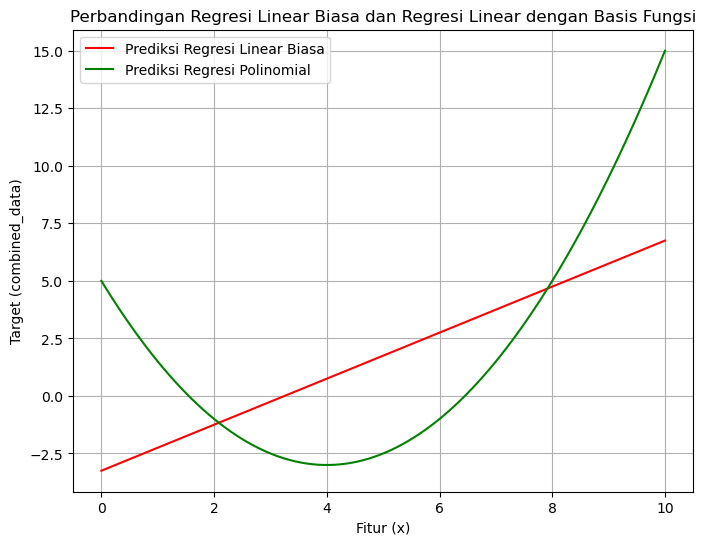

In [202]:

# Buat data dummy (ganti dengan data aslimu)
x = np.linspace(0, 10, 100)  # fitur
y = 0.5 * (x**2) - 4 * x + 5  # target non-linear

# Ubah x menjadi bentuk matrix (fitur 2D)
x = x.reshape(-1, 1)

# ======= 1. Linear Regression =======
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred_lr = linear_regressor.predict(x)

# ======= 2. Polynomial Regression (degree=2) =======
poly_features = PolynomialFeatures(degree=2)
x_poly = poly_features.fit_transform(x)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly, y)
y_pred_poly = poly_regressor.predict(x_poly)

# ======= Plot Perbandingan =======
plt.figure(figsize=(8, 6))
plt.plot(x, y_pred_lr, color='red', label='Prediksi Regresi Linear Biasa')
plt.plot(x, y_pred_poly, color='green', label='Prediksi Regresi Polinomial')
plt.title('Perbandingan Regresi Linear Biasa dan Regresi Linear dengan Basis Fungsi')
plt.xlabel('Fitur (x)')
plt.ylabel('Target (combined_data)')
plt.legend()
plt.grid(True)
plt.show()


# K-NN

In [203]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


In [204]:
# Load dataset 'MaterialStrength.csv'
df = pd.read_csv("D:\\Semester 7\\ML\\Task 3\\MaterialStrength.csv")
print(df.head())

      x1     x2   x3     x4   x5      x6     x7   x8        x9    x10  \
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28  0.300000  540.0   
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28  0.300000  540.0   
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270  0.685714  475.0   
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365  0.685714  475.0   
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360  0.966767  331.0   

        x11  x12       x13  x14  x15  target_feature  
0  1.538462    1  0.350044  YEs   NO           79.99  
1  1.560651    1  0.452416  yES  nOO           61.89  
2  1.569024    0  6.704743  yEs   NO           40.27  
3  1.569024    0  8.891596  yes  NOO           41.05  
4  1.185221    0  8.126411  YeS   no           44.30  


In [205]:
# Ubah nilai string menjadi integer pada kolom x14 dan x15 menggunakan LabelEncoder
label_encoder = LabelEncoder()
df['x14'] = label_encoder.fit_transform(df['x14'])
df['x15'] = label_encoder.fit_transform(df['x15'])

# Verifikasi apakah kolom sudah berubah menjadi integer
print(df[['x14', 'x15']].head())


   x14  x15
0    2    0
1    5    6
2    6    0
3    7    1
4    3    7


In [206]:
# Pisahkan fitur (x1 - x15) dan target (target_feature)
X = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15']]
y = df['target_feature']

# Split dataset menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [207]:
# Inisialisasi model Linear Regression
linear_regressor = LinearRegression()

# Latih model dengan data latih
linear_regressor.fit(X_train, y_train)

# Prediksi menggunakan data uji
y_pred_lr = linear_regressor.predict(X_test)

# Hitung evaluasi metrik untuk Linear Regression
rmse_lr = sqrt(mean_squared_error(y_test, y_pred_lr))
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("=== Linear Regression ===")
print(f"RMSE: {rmse_lr}, \nMSE: {mse_lr}, \nR2: {r2_lr}")

=== Linear Regression ===
RMSE: 8.687203153089012, 
MSE: 75.46749862303967, 
R2: 0.7071235323232181


In [208]:
# Definisikan derajat polinomial yang diinginkan
poly_features = PolynomialFeatures(degree=2)

# Transformasikan fitur menjadi fitur polinomial
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Inisialisasi model Linear Regression untuk basis fungsi
poly_regressor = LinearRegression()

# Latih model dengan data latih (fitur polinomial)
poly_regressor.fit(X_train_poly, y_train)

# Prediksi menggunakan data uji (fitur polinomial)
y_pred_poly = poly_regressor.predict(X_test_poly)

# Hitung evaluasi metrik untuk Polynomial Regression
rmse_poly = sqrt(mean_squared_error(y_test, y_pred_poly))
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("=== Polynomial Regression ===")
print(f"RMSE: {rmse_poly}, \nMSE: {mse_poly}, \nR2: {r2_poly}")


=== Polynomial Regression ===
RMSE: 5.886232327328455, 
MSE: 34.64773101128656, 
R2: 0.8655380759035395


In [209]:
# ======= Perbandingan Hasil =======
print("\n=== Perbandingan Hasil ===")
print(f"Linear Regression: RMSE = {rmse_lr}, MSE = {mse_lr}, R2 = {r2_lr}")
print(f"Polynomial Regression: RMSE = {rmse_poly}, MSE = {mse_poly}, R2 = {r2_poly}")



=== Perbandingan Hasil ===
Linear Regression: RMSE = 8.687203153089012, MSE = 75.46749862303967, R2 = 0.7071235323232181
Polynomial Regression: RMSE = 5.886232327328455, MSE = 34.64773101128656, R2 = 0.8655380759035395


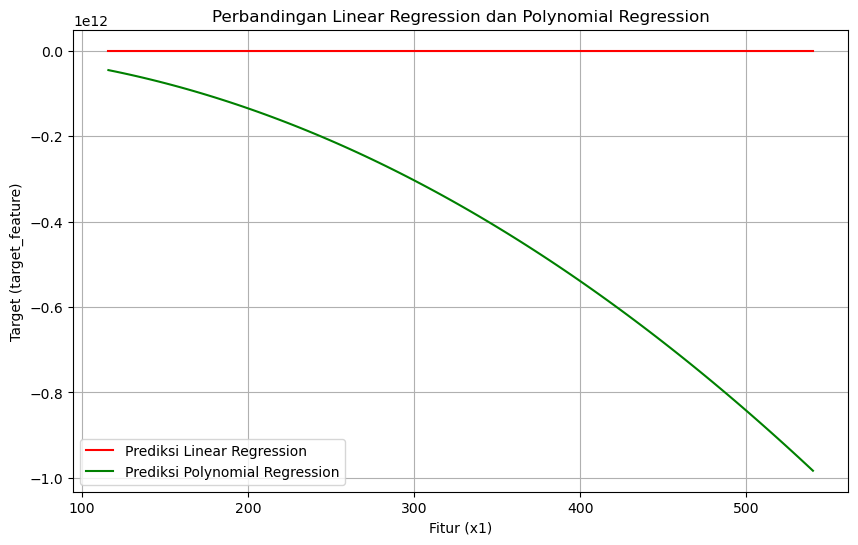

In [210]:
# Di sini kita ambil 'x1' untuk contoh
x1 = X_test[['x1']]
y_test_array = y_test.to_numpy()

# Buat data dummy untuk prediksi dengan lebih halus
x1_range = np.linspace(x1.min(), x1.max(), 100).reshape(-1, 1)

# Buat dataset dengan kolom nol untuk fitur lainnya
x1_range_full = np.hstack([x1_range, np.zeros((x1_range.shape[0], X.shape[1] - 1))])  # nol untuk kolom lain

# Buat DataFrame dari x1_range_full dengan nama kolom
x1_range_df = pd.DataFrame(x1_range_full, columns=X.columns)

# Prediksi menggunakan model linear
y_pred_lr_range = linear_regressor.predict(x1_range_df)

# Untuk prediksi model polinomial, kita perlu transformasi
x1_range_poly = poly_features.transform(x1_range_df)  # Transformasi dengan kolom nol
y_pred_poly_range = poly_regressor.predict(x1_range_poly)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.plot(x1_range, y_pred_lr_range, color='red', label='Prediksi Linear Regression')
plt.plot(x1_range, y_pred_poly_range, color='green', label='Prediksi Polynomial Regression')
plt.title('Perbandingan Linear Regression dan Polynomial Regression')
plt.xlabel('Fitur (x1)')
plt.ylabel('Target (target_feature)')
plt.legend()
plt.grid(True)
plt.show()